In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data=pd.read_csv(file_url)

In [32]:
data.info()
#   alcohol                       알콜도수
#   malic_acid                    알산
#   ash                           증발/소각후 남은 무기물
#   alcalinity_of_ash             남은 무기물의 알카리성
#   magnesium                     마그네슘
#   total_phenols                 젠체페놀
#   flavanoids                    플라포노이드(색소)
#   nonflavanoid_phenols          비색소 페놀
#   proanthocyanins               프로안토시아닌
#   color_intensity               색상강도
#   hue                           색조
#  od280/od315_of_diluted_wines   희석된완인의 단백질 함량
#  proline                        프로틴
#  class                          와인등급

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [33]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [34]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [35]:
data['class'].nunique()

3

In [36]:
data['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

<AxesSubplot: ylabel='class'>

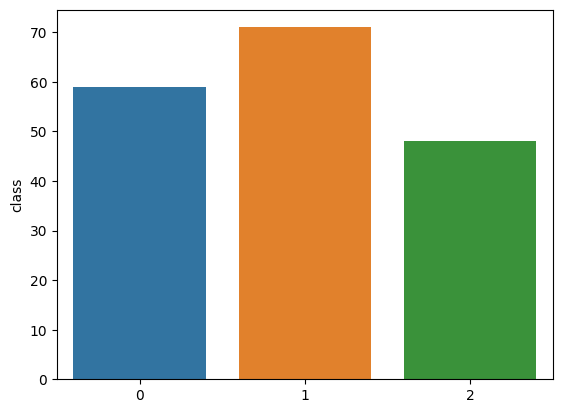

In [37]:
sns.barplot(x=data['class'].value_counts().index,y=data['class'].value_counts())

In [38]:
#결측치 처리하기
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [39]:
#결측치 데이터 삭제하기
#data=data.dropna()
#data.dropna(inplace=True)
#특정 필드 결측치가 있는 만 제거
data.dropna(subset=['alcohol'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [40]:
data.drop(['alcohol','nonflavanoid_phenols'],axis=1) #변수를 제거하기

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


In [41]:
data.fillna(data.mean()) #평균값으로 결측치 채우기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [42]:
data.fillna(data.median()) #중위값으로 결측치 채우기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [43]:
data.fillna(data.median(),inplace=True) #평균값으로 결측치 채우기

In [44]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [45]:
#스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [46]:
#표준화 스케일링
st_scaler=StandardScaler() 
st_scaler.fit(data) #학습 -> 평균과 표준편차가 학습된다. 

StandardScaler()

In [47]:
st_scaled=st_scaler.transform(data) #평균과 표준편차로 스케일링 작업을 하여 데이터를 스케일된 데이터로 변환시켜줍니다.


In [48]:
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [49]:
pd.DataFrame(st_scaled,columns=data.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [50]:
st_scaled=pd.DataFrame(st_scaled,columns=data.columns)
round(st_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [51]:
#로버스트 스케일링
rb_scaler=RobustScaler() #객체 생성
rb_scaled=rb_scaler.fit_transform(data) #fit(data), transform(data) 을 합쳐 fit_transform(data)로 처리
rb_scaled=pd.DataFrame(rb_scaled,columns=data.columns)
round(rb_scaled.describe(),2)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


In [52]:
#최소-최대 스케일링
mm_scaler=MinMaxScaler() #객체 생성
mm_scaled=mm_scaler.fit_transform(data) #fit(data), transform(data) 을 합쳐 fit_transform(data)로 처리
mm_scaled=pd.DataFrame(mm_scaled,columns=data.columns)
round(mm_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [74]:
#훈련셋 시험셋을 나눈다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.drop('class',axis=1),data['class'],test_size=0.2,random_state=100)

In [87]:
#스캐일링
mm_scaler=MinMaxScaler() #최대최소
#mm_scaler=RobustScaler()  #로버스트
#mm_scaler=StandardScaler()  #표준화
mm_scaler.fit(X_train) #train 데이터로 평균과 분산을 계산 1 
X_train_scaled=mm_scaler.transform(X_train) # train 데이터 평균 분산 값으로 train 데이터 스케일링
X_test_scaled=mm_scaler.transform(X_test) # train 데이터 평균 분삭 값으로 test 데이터 스케일링

In [88]:
#KNN 모델생성
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() #KNN 모델생성 # 기본값 5
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)

In [89]:
pred

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8888888888888888

In [91]:
#하이퍼파라미터 튜닝하기 
knn=KNeighborsClassifier(n_neighbors=7) #KNN 모델생성 # 기본값 5
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.9166666666666666

In [92]:
#하이퍼파라미터 튜닝하기 
knn=KNeighborsClassifier(n_neighbors=3) #KNN 모델생성 # 기본값 5
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.8888888888888888

In [93]:
pred_accuracy_score=[]
for i in range(1,21,2):
    knn=KNeighborsClassifier(n_neighbors=i) #KNN 모델생성 # 기본값 5
    knn.fit(X_train_scaled,y_train)
    pred=knn.predict(X_test_scaled)
    print (i ,":", accuracy_score(y_test,pred))
    pred_accuracy_score.append(accuracy_score(y_test,pred))


1 : 0.9166666666666666
3 : 0.8888888888888888
5 : 0.8888888888888888
7 : 0.9166666666666666
9 : 0.8888888888888888
11 : 0.9166666666666666
13 : 0.9722222222222222
15 : 0.9444444444444444
17 : 0.9166666666666666
19 : 0.9444444444444444


<AxesSubplot: >

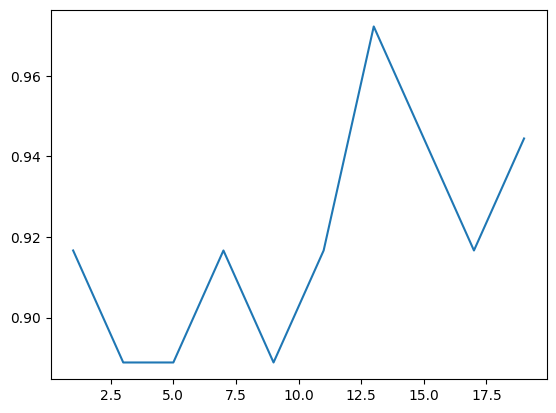

In [94]:
sns.lineplot(x=range(1,21,2),y=pred_accuracy_score)

In [98]:
#하이퍼파라미터 튜닝하기 
knn=KNeighborsClassifier(n_neighbors=13) #KNN 모델생성 # 기본값 5
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.9722222222222222

In [99]:
from sklearn.metrics import confusion_matrix
best_knn_conf = confusion_matrix(y_test, pred)

print(best_knn_conf)

#실제 class 가 1인데 class를 0으로 잘못 예측한 사항이 한건 발생된것으로 해석 가능

[[ 8  0  0]
 [ 1 14  0]
 [ 0  0 13]]


In [100]:
import numpy as np
#신규 데이터로 예측 해보기
new_data=np.array([[13.23,1.40,2.43,14.60,100.00,2.00,1.06,0.38,2.99,4.64,1.54,2.92,1030.00]])
new_df = pd.DataFrame(new_data, columns=X_train.columns)
new_df_scaled=mm_scaler.transform(new_df)
new_pred=knn.predict(new_df_scaled)
print(new_pred)

[0]
